# Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

# Obtain data from only 9 years

In [67]:
awards_players_model = awards_players_cleaned[awards_players_cleaned['year'] != 10]
coaches_model = coaches_cleaned[coaches_cleaned['year'] != 10]
players_teams_model = players_teams_cleaned[players_teams_cleaned['year'] != 10]
series_post_model = series_post_cleaned[series_post_cleaned['year'] != 10]
teams_model = teams_cleaned[teams_cleaned['year'] != 10]
teams_post_model = teams_post_cleaned[teams_post_cleaned['year'] != 10]

os.makedirs('../data/basketballPlayoffs_model', exist_ok=True)

for df, name in [(awards_players_model, 'awards'), 
                 (coaches_model, 'coaches'),
                 (players_teams_model, 'players'),
                 (series_post_model, 'series'),
                 (teams_model, 'teams'),
                 (teams_post_model, 'teams_post')]:
    if df['year'].max() != 9:
        print(f"Warning: {name} contains data beyond year 9")

awards_players_model.to_csv('../data/basketballPlayoffs_model/awards_players_model.csv', index=False)
coaches_model.to_csv('../data/basketballPlayoffs_model/coaches_model.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_model/players_model.csv', index=False)
players_teams_model.to_csv('../data/basketballPlayoffs_model/players_teams_model.csv', index=False)
series_post_model.to_csv('../data/basketballPlayoffs_model/series_post_model.csv', index=False)
teams_model.to_csv('../data/basketballPlayoffs_model/teams_model.csv', index=False)
teams_post_model.to_csv('../data/basketballPlayoffs_model/teams_post_model.csv', index=False)

# Overalls from only 9 years

In [68]:
players_overall_avg = players_teams_model.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv', index=False)

In [69]:
rookie_players = players_teams_model[players_teams_model['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_avg_model.csv', index=False)

In [70]:
rookie_coaches = coaches_model[coaches_model['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/basketballPlayoffs_model/rookie_overall_coaches_avg_model.csv', index=False)

In [71]:
coaches_overall_avg = coaches_model.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv', index=False)

# Obtain ranks from the 10th year to compare

In [72]:
playoffs_10th_year = teams_cleaned[teams_cleaned['year'] == 10][['tmID', 'playoff']]

playoffs_10th_year.to_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv', index=False)

# Obtain teams line up and coach from the 10th year

In [73]:
coaches_model_10th_year = coaches_cleaned[coaches_cleaned['year'] == 10][['coachID', 'tmID',]]

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)

In [74]:
players_model_10th_year = players_teams_cleaned[players_teams_cleaned['year'] == 10][['playerID','tmID']]

players_model_10th_year = players_model_10th_year.sort_values(by='tmID')

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

# Add overalls calculated from 9 years to the 10th year players and coach

In [75]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')
players_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/players_overall_all_time_model.csv')

rookie_avg = 5.6 

players_model_10th_year = players_model_10th_year.merge(
    players_overall_all_time_model[['playerID', 'OVERALL_ALL_TIME']],
    on='playerID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg})

players_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

players_model_10th_year.to_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv', index=False)

In [76]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')
coaches_overall_all_time_model = pd.read_csv('../data/basketballPlayoffs_model/coaches_overall_all_time_model.csv')

rookie_avg_coach = 8.9 

coaches_model_10th_year = coaches_model_10th_year.merge(
    coaches_overall_all_time_model[['coachID', 'OVERALL_ALL_TIME']],
    on='coachID',
    how='left'
).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

coaches_model_10th_year.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

coaches_model_10th_year.to_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv', index=False)


# Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [77]:
players_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/players_model_10th_year.csv')

team_overall = players_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/basketballPlayoffs_model/team_overall.csv', index=False)

# Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [78]:
coaches_model_10th_year = pd.read_csv('../data/basketballPlayoffs_model/coaches_model_10th_year.csv')

team_overall_coaches = coaches_model_10th_year.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/basketballPlayoffs_model/team_overall_coaches.csv', index=False)

# Models

Preparing training data...
Preparing validation data...
Preparing test data...

Model Performance:
-----------------

SVM:
Validation Accuracy (Year 9): 71.43%
Test Accuracy (Year 10): 62.50%
Predicted playoff teams: [7, 5, 11, 4, 17, 8, 16, 15]
Actual playoff teams: [0, 5, 7, 8, 13, 16, 17, 19]

Decision Tree:
Validation Accuracy (Year 9): 85.71%
Test Accuracy (Year 10): 50.00%
Predicted playoff teams: [0, 2, 11, 19, 8, 10, 13, 15]
Actual playoff teams: [0, 5, 7, 8, 13, 16, 17, 19]

Random Forest:
Validation Accuracy (Year 9): 92.86%
Test Accuracy (Year 10): 75.00%
Predicted playoff teams: [7, 5, 4, 11, 17, 8, 16, 13]
Actual playoff teams: [0, 5, 7, 8, 13, 16, 17, 19]

Logistic Regression:
Validation Accuracy (Year 9): 78.57%
Test Accuracy (Year 10): 75.00%
Predicted playoff teams: [5, 19, 7, 4, 8, 13, 15, 16]
Actual playoff teams: [0, 5, 7, 8, 13, 16, 17, 19]

KNN:
Validation Accuracy (Year 9): 85.71%
Test Accuracy (Year 10): 87.50%
Predicted playoff teams: [7, 5, 11, 0, 16, 8, 13, 1

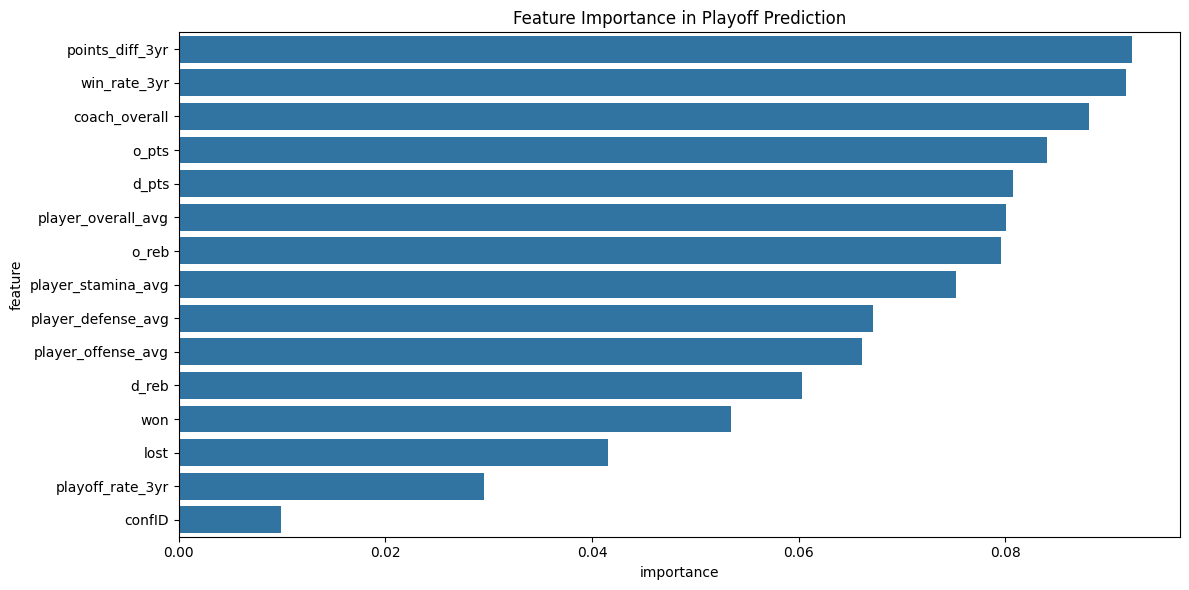

In [79]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


def create_features_for_team(team_data, teams_history, players_teams_data, coaches_data, year):
    features = {
        'won': team_data['won'],
        'lost': team_data['lost'],
        'o_pts': team_data['o_pts'],
        'd_pts': team_data['d_pts'],
        'o_reb': team_data['o_reb'],
        'd_reb': team_data['d_reb'],
        'confID': team_data['confID']
    }
    
    # Calculate historical averages
    team_history_data = teams_history[
        (teams_history['tmID'] == team_data['tmID']) & 
        (teams_history['year'] <= year)
    ].sort_values('year')
    
    # 3-year rolling averages
    features['win_rate_3yr'] = team_history_data['won'].tail(3).mean()
    features['playoff_rate_3yr'] = team_history_data['playoff'].tail(3).mean()
    features['points_diff_3yr'] = (team_history_data['o_pts'] - team_history_data['d_pts']).tail(3).mean()
    
    # Player stats
    team_players = players_teams_data[
        (players_teams_data['year'] == year) & 
        (players_teams_data['tmID'] == team_data['tmID'])
    ]
    features['player_overall_avg'] = team_players['OVERALL'].mean()
    features['player_stamina_avg'] = team_players['overallSTAMINA'].mean()
    features['player_defense_avg'] = team_players['overallDEFENSE'].mean()
    features['player_offense_avg'] = team_players['overallOFFENSE'].mean()
    
    # Coach stats
    team_coach = coaches_data[
        (coaches_data['year'] == year) & 
        (coaches_data['tmID'] == team_data['tmID'])
    ]
    features['coach_overall'] = team_coach['OVERALL'].mean() if len(team_coach) > 0 else 0
    
    return list(features.values())

# Prepare training data (years 1-8)
print("Preparing training data...")
X_train = []
y_train = []

for year in range(1, 9):
    current_year_teams = teams_model[teams_model['year'] == year]
    next_year_teams = teams_model[teams_model['year'] == year + 1]
    
    for _, team in current_year_teams.iterrows():
        # Only include teams that exist in the next year
        if team['tmID'] in next_year_teams['tmID'].values:
            features = create_features_for_team(team, teams_model, players_teams_model, coaches_model, year)
            X_train.append(features)
            
            # Get next year's playoff status
            next_year_playoff = next_year_teams[next_year_teams['tmID'] == team['tmID']]['playoff'].iloc[0]
            y_train.append(next_year_playoff)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare validation data (year 9)
print("Preparing validation data...")
X_val = []
y_val = []

year_9_teams = teams_model[teams_model['year'] == 9]
for _, team in year_9_teams.iterrows():
    features = create_features_for_team(team, teams_model, players_teams_model, coaches_model, 9)
    X_val.append(features)
    y_val.append(team['playoff'])

X_val = np.array(X_val)
y_val = np.array(y_val)

# Prepare test data (year 10)
print("Preparing test data...")
X_test = []
year_10_teams = teams_cleaned[teams_cleaned['year'] == 10]
for _, team in year_10_teams.iterrows():
    features = create_features_for_team(team, teams_cleaned, players_teams_cleaned, coaches_cleaned, 10)
    X_test.append(features)

X_test = np.array(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
# Initialize models

models = {
    'SVM': SVC(kernel='rbf', probability=True, C=1.0, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}
# Train and evaluate models
model_predictions = {}
print("\nModel Performance:")
print("-----------------")

for name, model in models.items():
    # Train model on years 1-8
    model.fit(X_train_scaled, y_train)
    
    # Validate on year 9
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    
    print(f"\n{name}:")
    print(f"Validation Accuracy (Year 9): {val_accuracy:.2f}%")
    
    # Make predictions for year 10
    probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Create DataFrame with predictions
    pred_df = pd.DataFrame({
        'tmID': year_10_teams['tmID'],
        'confID': year_10_teams['confID'],
        'playoff_prob': probs
    })
    
    # Select top 4 teams from each conference
    predictions = []
    for conf in [0, 1]:  # Eastern and Western conferences
        conf_teams = pred_df[pred_df['confID'] == conf].nlargest(4, 'playoff_prob')
        predictions.extend(conf_teams['tmID'].tolist())
    
    # Calculate accuracy for year 10
    actual_playoff_teams = playoffs_10th_year[playoffs_10th_year['playoff'] == 1]['tmID'].tolist()
    correct = len(set(predictions) & set(actual_playoff_teams))
    test_accuracy = (correct / len(predictions)) * 100
    
    print(f"Test Accuracy (Year 10): {test_accuracy:.2f}%")
    print("Predicted playoff teams:", predictions)
    print("Actual playoff teams:", actual_playoff_teams)
    
    # Store predictions
    model_predictions[name] = {
        'validation_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'predictions': predictions,
        'prediction_probabilities': dict(zip(year_10_teams['tmID'], probs))
    }

# Identify best model based on validation accuracy
best_model = max(model_predictions.items(), key=lambda x: x[1]['validation_accuracy'])
print(f"\nBest Model: {best_model[0]}")
print(f"Validation Accuracy: {best_model[1]['validation_accuracy']:.2f}%")
print(f"Test Accuracy: {best_model[1]['test_accuracy']:.2f}%")

# Save results and feature importance for Random Forest
rf_model = models['Random Forest']
feature_names = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'confID', 
                'win_rate_3yr', 'playoff_rate_3yr', 'points_diff_3yr',
                'player_overall_avg', 'player_stamina_avg', 'player_defense_avg', 
                'player_offense_avg', 'coach_overall']

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Save results
results = {
    'model_predictions': model_predictions,
    'best_model': {
        'name': best_model[0],
        'validation_accuracy': best_model[1]['validation_accuracy'],
        'test_accuracy': best_model[1]['test_accuracy'],
        'predictions': best_model[1]['predictions']
    }
}

pd.DataFrame([results]).to_csv('../data/basketballPlayoffs_model/ml_model_results.csv', index=False)
feature_importance.to_csv('../data/basketballPlayoffs_model/feature_importance.csv', index=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Playoff Prediction')
plt.tight_layout()
plt.show()

# Accuracy

In [80]:
team_final_overall = pd.read_csv('../data/basketballPlayoffs_model/team_final_overall.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

top_teams_by_conf = team_final_overall.sort_values(by='overall_team_final', ascending=False).groupby('confID').head(4)

print("Teams that go to the playoffs acording to the previsions:\n")
print(top_teams_by_conf)

comparison = top_teams_by_conf.merge(playoffs_10th_year, on='tmID', how='left')

correct_predictions = comparison[comparison['playoff'] == 1]

print("\nTeams that are in the playoffs and in the previsions:\n")
print(correct_predictions)

accuracy = len(correct_predictions) / len(top_teams_by_conf) * 100
print(f"\nThe accuracy is {accuracy:.2f}%")


Teams that go to the playoffs acording to the previsions:

    tmID  confID  overall_team_final
12     5       0               16.54
11     4       0               15.88
10    16       1               14.88
9      8       1               13.44
8     17       1               12.50
7     10       1                9.24
6     11       0                9.21
5      7       0                8.79

Teams that are in the playoffs and in the previsions:

   tmID  confID  overall_team_final  playoff
0     5       0               16.54        1
2    16       1               14.88        1
3     8       1               13.44        1
4    17       1               12.50        1
7     7       0                8.79        1

The accuracy is 62.50%


# Prepare predictions for the 11th year

## Cleaning data on 11th year files

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

coaches_11th = pd.read_csv('../data/Season_11/coaches.csv')
players_teams_11th = pd.read_csv('../data/Season_11/players_teams.csv')
teams_11th = pd.read_csv('../data/Season_11/teams.csv')

In [82]:
# coaches_11th = coaches_11th.drop(columns=['stint', 'lgID', 'year'])
# players_teams_11th = players_teams_11th.drop(columns=['stint', 'lgID', 'year'])
# teams_11th = teams_11th.drop(columns=['lgID', 'franchID', 'year', 'name', 'arena'])

# coaches_11th.to_csv('../data/Season_11/coaches.csv', index=False)
# players_teams_11th.to_csv('../data/Season_11/players_teams.csv', index=False)
# teams_11th.to_csv('../data/Season_11/teams.csv', index=False)

## Maping categorical values

In [83]:
# map_teams = {
#     'ATL': 0, 'CHI': 2, 'CON': 4, 'IND': 7, 
#     'LAS': 8, 'MIN': 10, 'NYL': 11, 'PHO': 13, 
#     'SAS': 16, 'SEA': 17, 'WAS': 19, 'TUL': 20
# }

# map_conf = {
#   'EA': 0, 'WE': 1
# }

# coaches_11th['tmID'] = coaches_11th['tmID'].map(map_teams)
# players_teams_11th['tmID'] = players_teams_11th['tmID'].map(map_teams)
# teams_11th['tmID'] = teams_11th['tmID'].map(map_teams)
# teams_11th['confID'] = teams_11th['confID'].map(map_conf)

# coaches_11th.to_csv('../data/Season_11/coaches.csv', index=False)
# players_teams_11th.to_csv('../data/Season_11/players_teams.csv', index=False)
# teams_11th.to_csv('../data/Season_11/teams.csv', index=False)

## Import data from the past 10 years

In [84]:
awards_players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv')
coaches_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv')
players_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv')
players_teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv')
series_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv')
teams_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv')
teams_post_cleaned = pd.read_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv')

In [85]:
awards_players_10_years = awards_players_cleaned[awards_players_cleaned['year'] != 11]
coaches__10_years = coaches_cleaned[coaches_cleaned['year'] != 11]
players_teams_10_years = players_teams_cleaned[players_teams_cleaned['year'] != 11]
series_post_10_years = series_post_cleaned[series_post_cleaned['year'] != 11]
teams_10_years = teams_cleaned[teams_cleaned['year'] != 11]
teams_post_10_years = teams_post_cleaned[teams_post_cleaned['year'] != 11]

for df, name in [(awards_players_10_years, 'awards'), 
                 (coaches__10_years, 'coaches'),
                 (players_teams_10_years, 'players'),
                 (series_post_10_years, 'series'),
                 (teams_10_years, 'teams'),
                 (teams_post_10_years, 'teams_post')]:
    if df['year'].max() != 10:
        print(f"Warning: {name} contains data beyond year 10")

awards_players_10_years.to_csv('../data/Season_11/awards_players_10_years.csv', index=False)
coaches__10_years.to_csv('../data/Season_11/coaches_10_years.csv', index=False)
players_cleaned.to_csv('../data/Season_11/players_10_years.csv', index=False)
players_teams_10_years.to_csv('../data/Season_11/players_teams_10_years.csv', index=False)
series_post_10_years.to_csv('../data/Season_11/series_post_10_years.csv', index=False)
teams_10_years.to_csv('../data/Season_11/teams_10_years.csv', index=False)
teams_post_10_years.to_csv('../data/Season_11/teams_post_10_years.csv', index=False)

## Overalls from 10 years

In [86]:
players_overall_avg = players_teams_10_years.groupby('playerID')['OVERALL'].mean().reset_index()

players_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

players_overall_avg['OVERALL_ALL_TIME'] = players_overall_avg['OVERALL_ALL_TIME'].round(1)

players_overall_avg.to_csv('../data/Season_11/players_overall_all_time_10_years.csv', index=False)

In [87]:
rookie_players = players_teams_10_years[players_teams_10_years['is_rookie'] == 1]

rookie_overall_avg = rookie_players['OVERALL'].mean().round(1)

rookie_overall_avg_df = pd.DataFrame({'rookie_overall_avg': [rookie_overall_avg]})

rookie_overall_avg_df.to_csv('../data/Season_11/rookie_overall_avg_10_years.csv', index=False)

In [88]:
rookie_coaches = coaches__10_years[coaches__10_years['is_rookie'] == 1]

rookie_overall_coaches_avg = rookie_coaches['OVERALL'].mean().round(1)

rookie_overall_coaches_avg_df = pd.DataFrame({'rookie_overall_coaches_avg': [rookie_overall_coaches_avg]})

rookie_overall_coaches_avg_df.to_csv('../data/Season_11/rookie_overall_coaches_avg_10_years.csv', index=False)

In [89]:
coaches_overall_avg = coaches__10_years.groupby('coachID')['OVERALL'].mean().reset_index()

coaches_overall_avg.rename(columns={'OVERALL': 'OVERALL_ALL_TIME'}, inplace=True)

coaches_overall_avg['OVERALL_ALL_TIME'] = coaches_overall_avg['OVERALL_ALL_TIME'].round(1)

coaches_overall_avg.to_csv('../data/Season_11/coaches_overall_all_time_10_years.csv', index=False)

# Add overalls calculated from 10 years to the 11th year players and coach

In [90]:
# players_teams = pd.read_csv('../data/Season_11/players_teams.csv')
# players_overall_all_time_10_years = pd.read_csv('../data/Season_11/players_overall_all_time_10_years.csv')

# rookie_avg = 5.6 

# players_teams = players_teams.merge(
#     players_overall_all_time_10_years[['playerID', 'OVERALL_ALL_TIME']],
#     on='playerID',
#     how='left'
# ).fillna({'OVERALL_ALL_TIME': rookie_avg})

# players_teams.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

# players_teams.to_csv('../data/Season_11/players_teams.csv', index=False)

In [91]:
# coaches = pd.read_csv('../data/Season_11/coaches.csv')
# coaches_overall_all_time_10_years = pd.read_csv('../data/Season_11/coaches_overall_all_time_10_years.csv')

# rookie_avg_coach = 9.0 

# coaches = coaches.merge(
#     coaches_overall_all_time_10_years[['coachID', 'OVERALL_ALL_TIME']],
#     on='coachID',
#     how='left'
# ).fillna({'OVERALL_ALL_TIME': rookie_avg_coach})

# coaches.rename(columns={'OVERALL_ALL_TIME': 'OVERALL'}, inplace=True)

# coaches.to_csv('../data/Season_11/coaches.csv', index=False)

## Given the teams players composition and their respective overalls calculate the team overall (mean of all players)

In [92]:
players = pd.read_csv('../data/Season_11/players_teams.csv')

team_overall = players.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall['overall_team'] = team_overall['OVERALL'].round(1)

team_overall = team_overall.drop(columns=['OVERALL'])

team_overall.to_csv('../data/Season_11/team_overall.csv', index=False)

## Given the team coaches and their respective overalls calculate the coach overall (mean of all coaches(1 or more than 1))

In [93]:
coaches = pd.read_csv('../data/Season_11/coaches.csv')

team_overall_coaches = coaches.groupby('tmID')['OVERALL'].mean().reset_index()

team_overall_coaches['overall_team_coach'] = team_overall_coaches['OVERALL'].round(1)

team_overall_coaches = team_overall_coaches.drop(columns=['OVERALL'])

team_overall_coaches.to_csv('../data/Season_11/team_overall_coaches.csv', index=False)

## Models

Preparing training and validation data...

Model Performance:
-----------------

SVM:
Validation Accuracy (Year 10): 53.85%
Predicted playoff teams for year 11: [5, 7, 11, 4, 17, 8, 16, 15]

Decision Tree:
Validation Accuracy (Year 10): 61.54%
Predicted playoff teams for year 11: [2, 5, 11, 7, 10, 17, 8, 15]

Random Forest:
Validation Accuracy (Year 10): 69.23%
Predicted playoff teams for year 11: [7, 5, 4, 11, 16, 17, 8, 13]

Logistic Regression:
Validation Accuracy (Year 10): 69.23%
Predicted playoff teams for year 11: [5, 19, 7, 4, 8, 13, 15, 17]

KNN:
Validation Accuracy (Year 10): 69.23%
Predicted playoff teams for year 11: [5, 7, 11, 0, 16, 8, 17, 10]

Best Model: Random Forest
Validation Accuracy: 69.23%


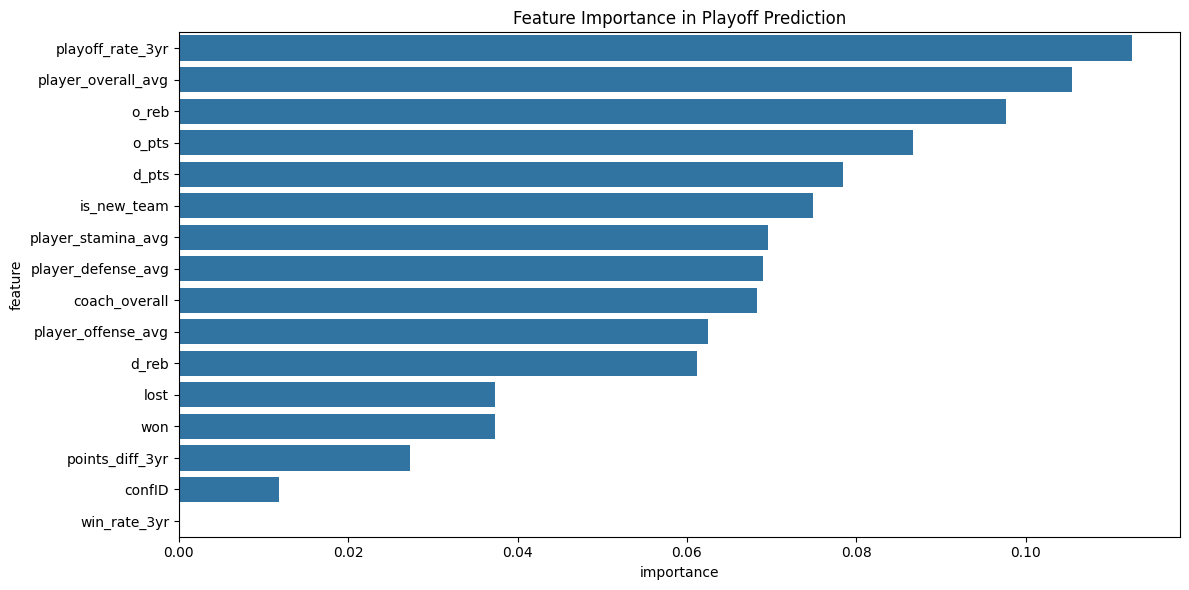

In [94]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

teams_10_years = pd.read_csv('../data/Season_11/teams_10_years.csv')
players_teams_10_years = pd.read_csv('../data/Season_11/players_teams_10_years.csv')
coaches__10_years = pd.read_csv('../data/Season_11/coaches_10_years.csv')
playoffs_10th_year = pd.read_csv('../data/basketballPlayoffs_model/playoffs_10th_year.csv')

def create_features_for_team(team_data, teams_history, players_teams_data, coaches_data, year):
    features = {
        'won': team_data['won'],
        'lost': team_data['lost'],
        'o_pts': team_data['o_pts'],
        'd_pts': team_data['d_pts'],
        'o_reb': team_data['o_reb'],
        'd_reb': team_data['d_reb'],
        'confID': team_data['confID'],
        'is_new_team': 0
    }
    
    # Calculate historical averages
    team_history_data = teams_history[
        (teams_history['tmID'] == team_data['tmID']) & 
        (teams_history['year'] <= year)
    ].sort_values('year')
    
    if team_history_data.empty: 
        features['win_rate_3yr'] = 0  # Neutral fallback
        features['playoff_rate_3yr'] = 0 
        features['points_diff_3yr'] = 0 
        features['is_new_team'] = 1  
    else:
        # 3-year rolling averages
        features['win_rate_3yr'] = team_history_data['won'].tail(3).mean()
        features['playoff_rate_3yr'] = team_history_data['playoff'].tail(3).mean()
        features['points_diff_3yr'] = (team_history_data['o_pts'] - team_history_data['d_pts']).tail(3).mean()
    
    # Player stats
    team_players = players_teams_data[
        (players_teams_data['year'] == year) & 
        (players_teams_data['tmID'] == team_data['tmID'])
    ]
    features['player_overall_avg'] = team_players['OVERALL'].mean()
    features['player_stamina_avg'] = team_players['overallSTAMINA'].mean()
    features['player_defense_avg'] = team_players['overallDEFENSE'].mean()
    features['player_offense_avg'] = team_players['overallOFFENSE'].mean()
    
    # Coach stats
    team_coach = coaches_data[
        (coaches_data['year'] == year) & 
        (coaches_data['tmID'] == team_data['tmID'])
    ]
    features['coach_overall'] = team_coach['OVERALL'].mean() if len(team_coach) > 0 else 0
    
    return list(features.values())

# Prepare training and validation data (years 1-10)
print("Preparing training and validation data...")
X_train = []
y_train = []
X_val = []
y_val = []

for year in range(1, 10):
    current_year_teams = teams_10_years[teams_10_years['year'] == year]
    next_year_teams = teams_10_years[teams_10_years['year'] == year + 1]
    
    for _, team in current_year_teams.iterrows():
        # Only include teams that exist in the next year
        if team['tmID'] in next_year_teams['tmID'].values:
            features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, year)
            X_train.append(features)
            
            # Get next year's playoff status
            next_year_playoff = next_year_teams[next_year_teams['tmID'] == team['tmID']]['playoff'].iloc[0]
            y_train.append(next_year_playoff)

year_10_teams = teams_10_years[teams_10_years['year'] == 10]
for _, team in year_10_teams.iterrows():
    features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, 10)
    X_val.append(features)
    y_val.append(team['playoff'])

# Convert to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize models

models = {
    'SVM': SVC(kernel='rbf', probability=True, C=1.0, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'Logistic Regression': LogisticRegression(C=1.0, max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

# Train and evaluate models
model_predictions = {}
print("\nModel Performance:")
print("-----------------")

for name, model in models.items():
    # Train model on years 1-9
    model.fit(X_train_scaled, y_train)
    
    # Validate on year 10
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred) * 100
    
    print(f"\n{name}:")
    print(f"Validation Accuracy (Year 10): {val_accuracy:.2f}%")
    
    # Make predictions for year 11
    X_predict = []
    year_11_teams = teams_10_years[teams_10_years['year'] == 10]
    for _, team in year_11_teams.iterrows():
        features = create_features_for_team(team, teams_10_years, players_teams_10_years, coaches__10_years, 10)
        X_predict.append(features)
    
    X_predict_scaled = scaler.transform(np.array(X_predict))
    probs = model.predict_proba(X_predict_scaled)[:, 1]
    
    # Create DataFrame with predictions
    pred_df = pd.DataFrame({
        'tmID': year_11_teams['tmID'],
        'confID': year_11_teams['confID'],
        'playoff_prob': probs
    })
    
    # Select top 4 teams from each conference
    predictions = []
    for conf in [0, 1]:  # Eastern and Western conferences
        conf_teams = pred_df[pred_df['confID'] == conf].nlargest(4, 'playoff_prob')
        predictions.extend(conf_teams['tmID'].tolist())
    
    # Calculate accuracy for year 10
    actual_playoff_teams = playoffs_10th_year[playoffs_10th_year['playoff'] == 1]['tmID'].tolist()
    correct = len(set(predictions) & set(actual_playoff_teams))
    test_accuracy = (correct / len(predictions)) * 100
    
    print("Predicted playoff teams for year 11:", predictions)
    
    # Store predictions
    model_predictions[name] = {
        'validation_accuracy': val_accuracy,
        'predictions': predictions,
        'prediction_probabilities': dict(zip(year_11_teams['tmID'], probs))
    }

# Identify best model based on validation accuracy
best_model = max(model_predictions.items(), key=lambda x: x[1]['validation_accuracy'])
print(f"\nBest Model: {best_model[0]}")
print(f"Validation Accuracy: {best_model[1]['validation_accuracy']:.2f}%")

# Save results and feature importance for Random Forest
rf_model = models['Random Forest']
feature_names = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'confID', 
                'win_rate_3yr', 'playoff_rate_3yr', 'points_diff_3yr',
                'player_overall_avg', 'player_stamina_avg', 'player_defense_avg', 
                'player_offense_avg', 'coach_overall', 'is_new_team']

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Save results
results = {
    'model_predictions': model_predictions,
    'best_model': {
        'name': best_model[0],
        'validation_accuracy': best_model[1]['validation_accuracy'],
        'predictions': best_model[1]['predictions']
    }
}

pd.DataFrame([results]).to_csv('../data/Season_11/ml_model_results.csv', index=False)
feature_importance.to_csv('../data/Season_11/feature_importance.csv', index=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Playoff Prediction')
plt.tight_layout()
plt.show()